# Edition, visualisation, traversal
## Boolean transducers
<br>


In [2]:
import awalipy # If import fails, check that 
               # Python version used as Jupyter
               # kernel matches the one
               # Awalipy was compiled with.

[Warning] The python module awalipy relies on compilation executed "on-the-fly" depending on the context (type of weights, of labels, etc.). As a result, the very first call to a given function in a given context may take up to one minute. 


## Creating a transducer

A **Transducer** is an automaton with multiple tapes.  It is built from a list of alphabets.

In [3]:
T = awalipy.Transducer(["012","01"])

---
Adding states is the same as for automata

In [4]:
stt_0 = T.add_state()
stt_1 = T.add_state()
T.set_initial(stt_0)
T.set_final(stt_0)

---
Transitions of transducer bear multiple labels (in the example, two). The third argument of `set_transition ` is now a list of labels.

In [5]:
tr_0 = T.set_transition(stt_0,stt_0,['0','0'])
tr_1 = T.set_transition(stt_0,stt_0,['1','1'])
tr_2 = T.set_transition(stt_0,stt_1,['2','0'])
tr_3 = T.set_transition(stt_1,stt_0,['0','1'])
tr_4 = T.set_transition(stt_1,stt_1,['2','1'])
tr_5 = T.set_transition(stt_1,stt_1,['1','0'])

# Displaying a Transducer

---
Displaying a Transducer is the same as for automata.

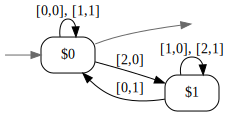

In [6]:
T.display()

In [7]:
T

Transducer (lat<lan<lal_char>,lan<lal_char>>_b):	Weight Set: B	Alphabets: ['012', '01']
States:{	0(i,f)	1	}
Transitions:{	0--(0,0)-->0	0--(1,1)-->0	0--(2,0)-->1	1--(0,1)-->0	1--(2,1)-->1	1--(1,0)-->1		}

NB: the mention "(i)" following a state means that the state is *initial*.  Similarly, "(f)" means *final* and "(i,f)" means *initial and final*.

## Epsilon transitions
By default, transducers allow epsilon on any number of tapes. 

In [8]:
stt_2 = T.add_state()

Adding an epsilon-transition, that is, with epsilon on all tapes.

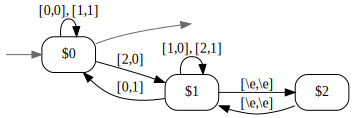

In [9]:
tr_6 = T.set_eps_transition(stt_2,stt_1)
tr_7 = T.set_transition(stt_1,stt_2,["",""])
T.display()

---
Adding a transition with epsilon on only one tape.

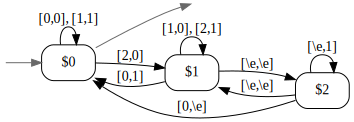

In [10]:
tr_8 = T.set_transition(stt_2,stt_0,["0",""])
tr_9 = T.set_transition(stt_2,stt_2,["","1"])
T.display()

## Deleting edges and states

Let us consider the automaton A

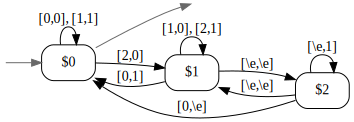

In [11]:
T.display()

<hr> Let us add a transition.

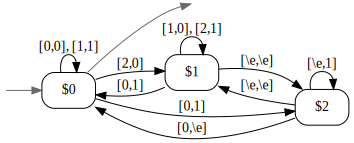

In [12]:
tr_10 = T.set_transition(stt_0,stt_2,["0","1"])
T.display()

---
Deleting the transition we just added by id.

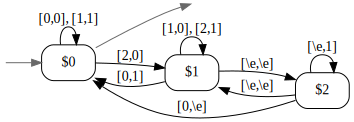

In [13]:
T.del_transition(tr_10)
T.display()

---
Deleting a transition by triplet (origin, destination, label list)  

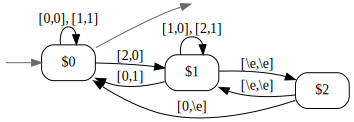

In [14]:
T.del_transition(stt_2,stt_2,["","1"])
T.display()

---
Deleting all transitions from a state to another (order matters).

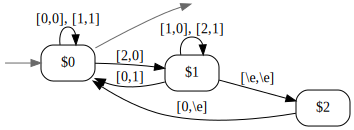

In [15]:
T.del_transition(stt_2,stt_1)
T.display()

---
Deleting a state (and all outgoing and incomings transitions) 

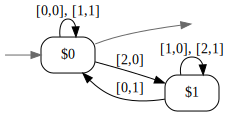

In [16]:
T.del_state(stt_2)
T.display()

## Loading & saving automata

Saving an automaton to file.  The format used is JavaScript Object Notation (JSON) hence the extension ".json" .

In [17]:
T.save("fibo_LR_additioner.json")

In [18]:
ls *json

fibo.json  fibo_LR_additioner.json


---
Loading an automaton.

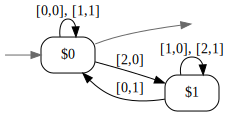

In [19]:
B = awalipy.load("fibo_LR_additioner.json")
B.display()

---
Listing the example automata given with the library.  Some of them are  transducers

In [20]:
awalipy.list_examples()["automata"]

{'a1': "NFA that accepts words with at least one factor 'ab'",
 'astar-bstar': "NFA with epsilon transition which recognizes words in 'a*b*'",
 'b1': "Z-FA that counts the number of 'b' in words of {a,b}*",
 'binary': 'Z-FA that converts words of {0,1}^* into their binary values',
 'binary-int': 'Z-FA whose labels are integers and that converts words of {0,1}^* into their binary values',
 'c1': 'Z-FA that converts words of {a,b}^* into their binary values',
 'd1': "Z-FA computes the difference between the numbers of 'a' and 'b'",
 'e1': 'Q-FA that converts words of {a,b}^* into their binary values after the radix point',
 'evena': "DFA which recognizes words with an even number of 'a'",
 'fibotdc-lr': "Sequential transducer which tries to replace 'abb' by 'baa'",
 'flipper': 'Transducer that mimics a flipper game',
 'gray': 'Gray code increment',
 'heapmodel': 'Z-max-plus automaton, heap model with 2 pieces',
 'lamplighter': 'Group automaton which realizes the Lamplighter group',
 'min

---
Loading an example automaton (given with the library): just use the name of the automaton given above, without extension.

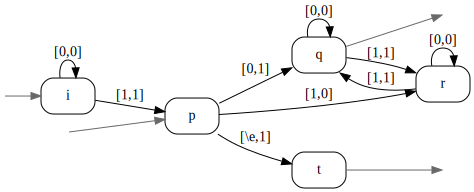

In [21]:
L = awalipy.load("gray")
L.display()

In [22]:
s = awalipy.RatExp("0")
for i in range(20):
    print (str(i) + " is represented as " + str(s))
    s = L(s)

0 is represented as 0
1 is represented as 1
2 is represented as 11
3 is represented as 01
4 is represented as 011
5 is represented as 111
6 is represented as 101
7 is represented as 001
8 is represented as 0011
9 is represented as 1011
10 is represented as 1111
11 is represented as 0111
12 is represented as 0101
13 is represented as 1101
14 is represented as 1001
15 is represented as 0001
16 is represented as 00011
17 is represented as 10011
18 is represented as 11011
19 is represented as 01011


## Access and browsing
Accessing and browsing is essentially the same for transducers and automata. 

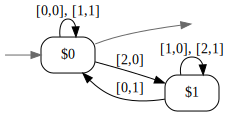

In [23]:
T.display()

---
Getting the list of states, or transitions<br>
(*It cannot be assumed that the ids of states are [0,1,...,n] for some n *)

In [24]:
T.states(), T.transitions()

([0, 1], [2, 3, 4, 5, 6, 7])

---
Getting the list of initial states,of final states.

In [25]:
T.initial_states(), T.final_states()

([0], [0])

---
List of transitions adjacent of a state

In [26]:
T.outgoing(stt_1), T.incoming(stt_1)

([5, 6, 7], [4, 6, 7])

---
List of transitions from a state to another.

In [27]:
T.outin(stt_0,stt_1)

[4]

---
List of states reachable from a state in one transition.

In [28]:
T.successors(stt_0), T.successors(stt_0, ["1","0"])

([0, 0, 1], [])

---
List of states that may reach a state in one transition.

In [29]:
T.predecessors(stt_0), T.predecessors(stt_0, ["0","0"])

([0, 0, 1], [0])